Analyzing Networks:

In [1]:
import math
import numpy as np
from Evaluation.Comparator import applyThreshold, calculateManualError, calculatePredictionError
from Evaluation.Evaluation import RMSE, PCK, AP
from fileHandler import Landmark as lm, Landmark

In [3]:
predictedFileName = 'F:/DLC/Test6.1-MMM-2021-12-18/labeled-data/test1/CollectedData_MMM.csv'
targetFileName = 'F:/DLC/Test6.1-MMM-2021-12-18/labeled-data/test1/CollectedData_MMM.csv'
manualTestNum = 3
thresh = 0.5

manuals = np.array()
predicted = np.array()

for i in range(manualTestNum):
    path = 'C:/Users/EMINENT/Desktop/manualTests/manualTest' + str(i) + '.csv'
    manuals[i], targetFrameNames = lm.csvReader(path)

predRows, predFrameNames = lm.csvReader(predictedFileName)
targetRows, targetFrameNames = lm.csvReader(targetFileName)

labelNames = lm.extractLabelNames(manuals[0, 1])

targetTensor, targetScores = lm.landmark2array(targetRows)
predTensor, predScores = lm.landmark2array(predRows)

predArray = applyThreshold(predRows, thresh)
frameIndexList = lm.extractFrameIndex(targetFrameNames)
pred_RMSE = calculatePredictionError(predArray, targetTensor, frameIndexList)

manual_RMSE = calculateManualError(manuals, 0)

TypeError: array() missing required argument 'object' (pos 1)

Averaged error of predicted (gray) and manual labeled (white) positions of each keypoint comparing with the ground truth positions. Error bars represent standard error of the mean (s.e.m).

Plot:

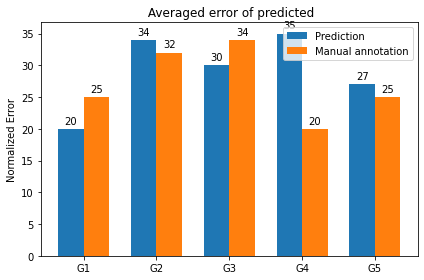

In [2]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['nose', 'L_eye', 'R eye', 'L ear', 'R ear', 'L shoulder', 'R shoulder', 'L elbow',
          'R elbow', 'L wrist', 'R wrist', 'L hip', 'R hip', 'L knee', 'R knee', 'L ankle',
          'R ankle'] # = labelNames

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pred_RMSE, width, label='Prediction')
rects2 = ax.bar(x + width/2, manual_RMSE, width, label='Manual annotation')

ax.set_ylabel('Normalized Error')
ax.set_title(' Averaged error of predicted')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Plot PCK:

In [ ]:
pckList = []
root = 'C:/Users/EMINENT/Desktop/networkOuts'
targetFileName = root + 'target.csv'

for i in range(7):
    predictedFileName = root+'filtered'+str(i)+'.csv'
    thresh = 0.5

    predRows, predFrameNames = lm.csvReader(predictedFileName)
    targetRows, targetFrameNames = lm.csvReader(targetFileName)

    targetTensor, targetScores = lm.landmark2array(targetRows)
    predTensor, predScores = lm.landmark2array(predRows)

    e = 0.1
    bb_width = math.sqrt((150^2)+(50^2))
    pck = PCK(predTensor, targetTensor, bb_width, e)
    pckList.append(pck)

AP Error:

In [ ]:
apList = []
root = 'C:/Users/EMINENT/Desktop/networkOuts'
targetFileName = root + 'target.csv'
e = 0.1
bb_width = math.sqrt((150^2)+(50^2))
k = 10

for i in range(7):
    predictedFileName = root+'filtered'+str(i)+'.csv'
    thresh = 0.5

    predRows, predFrameNames = lm.csvReader(predictedFileName)
    targetRows, targetFrameNames = lm.csvReader(targetFileName)

    targetTensor, targetScores = lm.landmark2array(targetRows)
    predTensor, predScores = lm.landmark2array(predRows)

    ap = AP(predTensor, targetTensor, bb_width, e, k)
    apList.append(ap)

Compare Networks: